In [96]:
import pandas as pd
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import tree

In [97]:
iris = load_iris()
print(iris.keys())
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0, stratify=iris.target)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


Training accuracy: 0.9642857142857143
Test accuracy: 0.9473684210526315


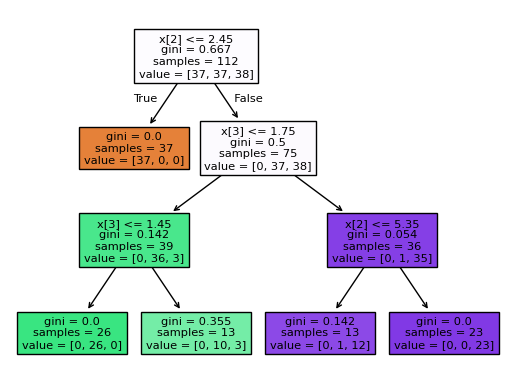

In [109]:
clf = tree.DecisionTreeClassifier()
# clf = tree.DecisionTreeClassifier(max_depth=4)
clf = tree.DecisionTreeClassifier(min_samples_leaf=0.1)
# clf = tree.DecisionTreeClassifier(max_features="log2", max_depth=4, min_samples_leaf=0.1)
# clf = tree.DecisionTreeClassifier(max_leaf_nodes=3)
# clf = tree.DecisionTreeClassifier(ccp_alpha=0.25)
clf = clf.fit(X_train, y_train)
_ = tree.plot_tree(clf, filled=True)

# y_pred = clf.predict(X_train)
# y_true = y_train
# accuracy_score(y_true, y_pred)
print(f"Training accuracy: {clf.score(X_train, y_train)}")
print(f"Test accuracy: {clf.score(X_test, y_test)}")

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

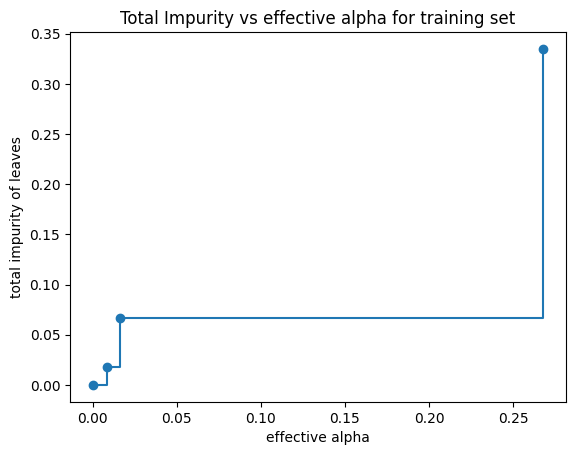

In [105]:
clf = tree.DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

ig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

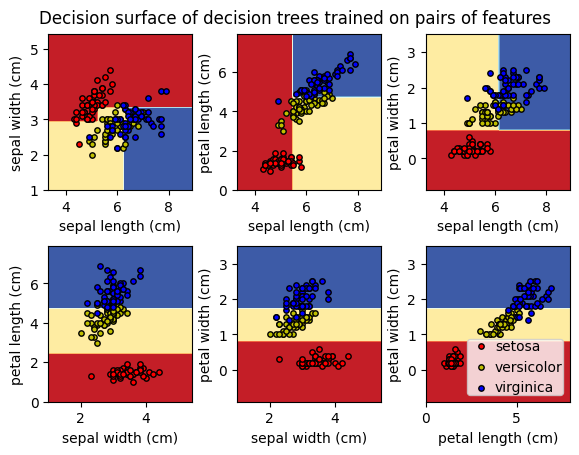

In [79]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    # clf = DecisionTreeClassifier().fit(X, y)
    clf.fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")